## Marketing Subscription Prediction

### Problem:
XYZ is one of the major banks in USA. XYZ intends to increase its client base by using customer retention and finding ways to bring in new clients in ways that are effective. Analysts and Data Engineers have managed to scramble together a dataset that contains the past data of clients and whether they have purchased a subscription or not. Use the data to identify if it can be justified spending on customer retention over advertising on bringing new clients.

# 

### Solution:
1. [Data Collection](#1-data-collection)
2. [Data Validation](#2-data-validation)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis-eda)
4. [Feature Extraction and Data Preprocessing](#4-feature-extraction-and-data-preprocessing)
5. [Model Building](#5-model-building)
6. [Model Deployment and Reiteration](#6-model-deployment-and-reiteration)
7. [Results]

# 

# 1. Data Collection

Let's import the given data and try to understand what we are supposed to work with

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('bank-additional-full.csv', sep=";")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Bank client data:

- Age (numeric)
- Job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- Education: (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### Related with the last contact of the current campaign:

- Contact: contact communication type (categorical: 'cellular', 'telephone')
- Month: last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- Duration: last contact duration, in seconds (numeric). 
> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

### Social and economic context attributes:

- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')


# 

# 2. Data Validation

Now let's check whether the given data is complete.

<Axes: >

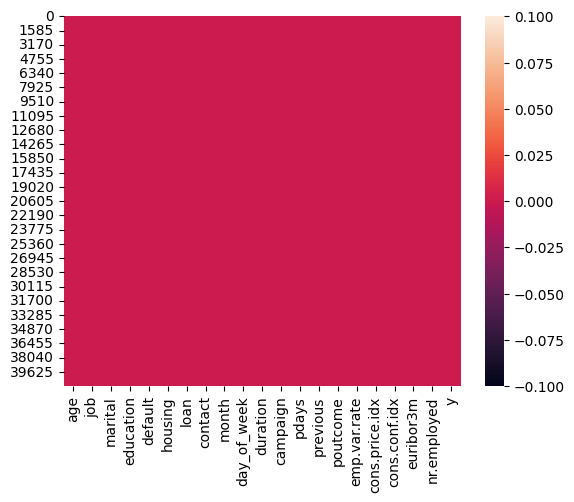

In [45]:
sns.heatmap(df.isnull())

In [46]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It appears that the data is complete and given the circumstances let's assume that the data is also valid

# 

# 3. Exploratory Data Analysis (EDA)
Let us find what patterns, trends and insights we can infer from the data

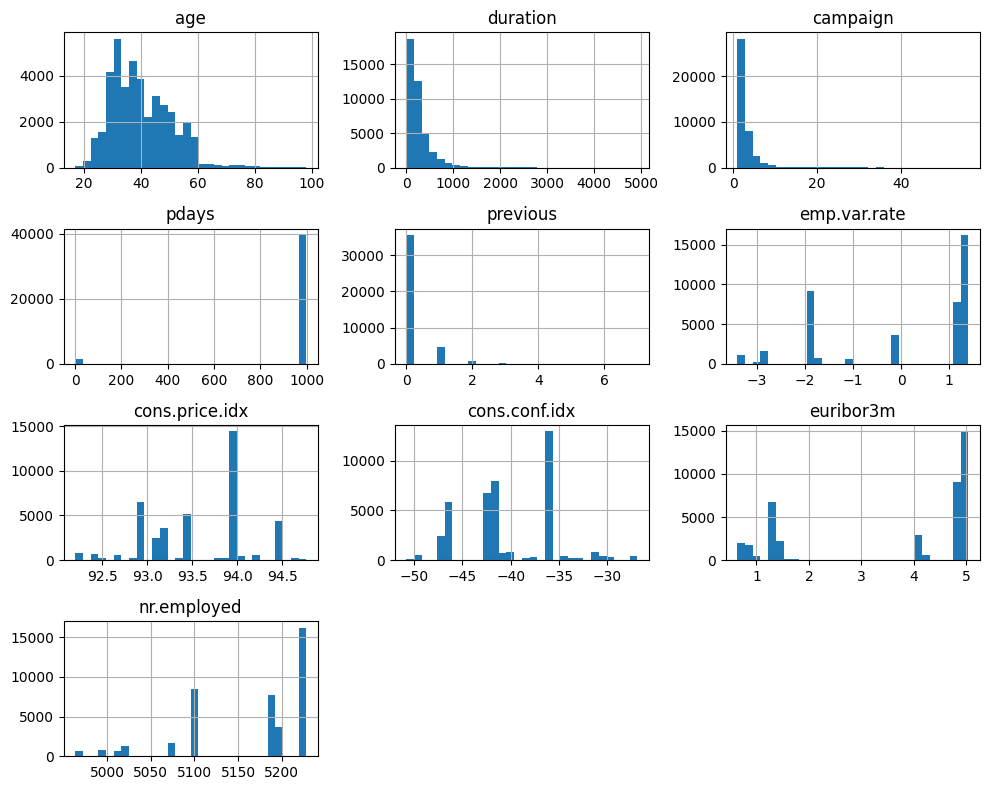

In [47]:
# Histogram for numeric columns
df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()


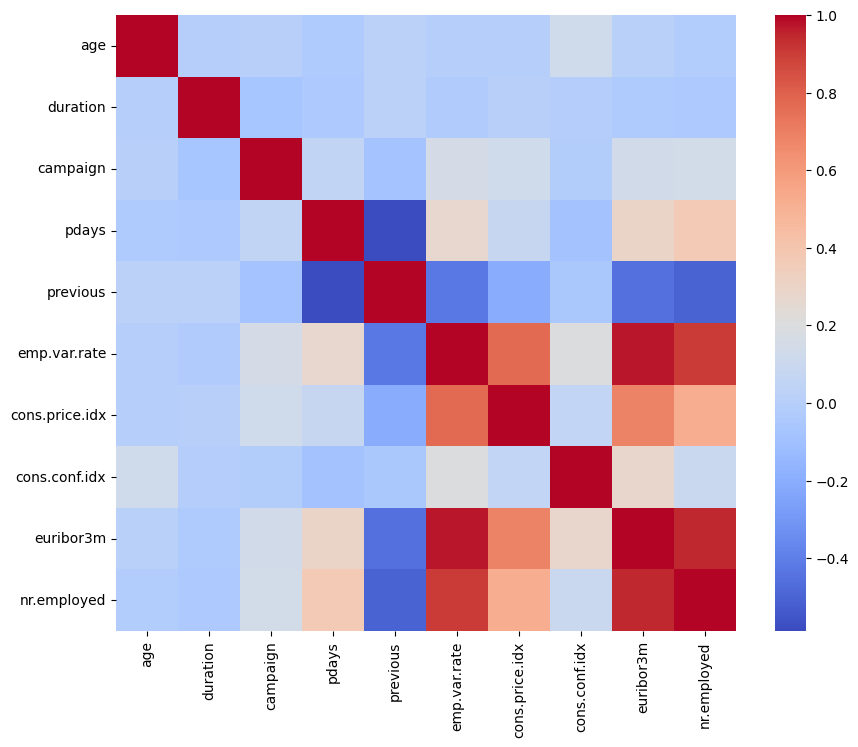

In [48]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),  cmap='coolwarm', fmt='.2f')
plt.show()


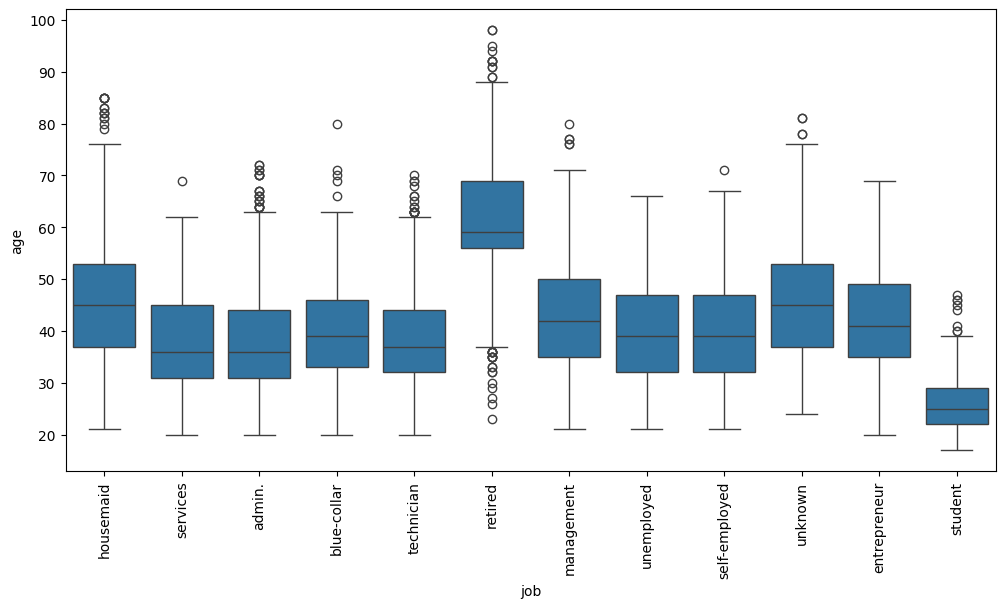

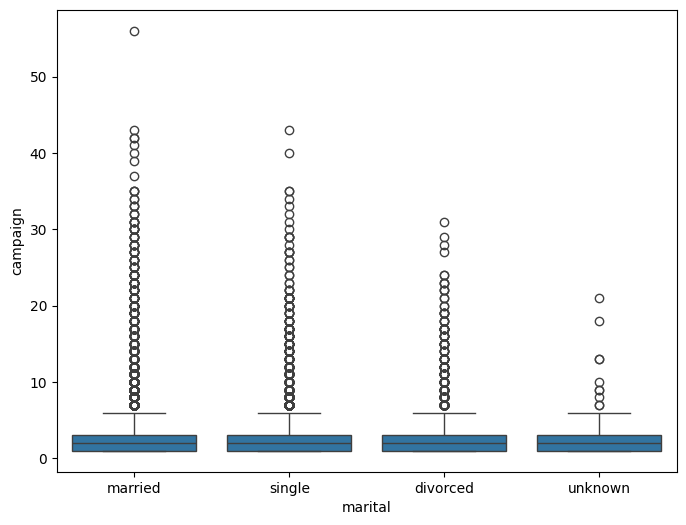

In [49]:
# Boxplot of age vs job
plt.figure(figsize=(12,6))
sns.boxplot(x='job', y='age', data=df)
plt.xticks(rotation=90)
plt.show()

# Boxplot of marital status vs campaign
plt.figure(figsize=(8,6))
sns.boxplot(x='marital', y='campaign', data=df)
plt.show()


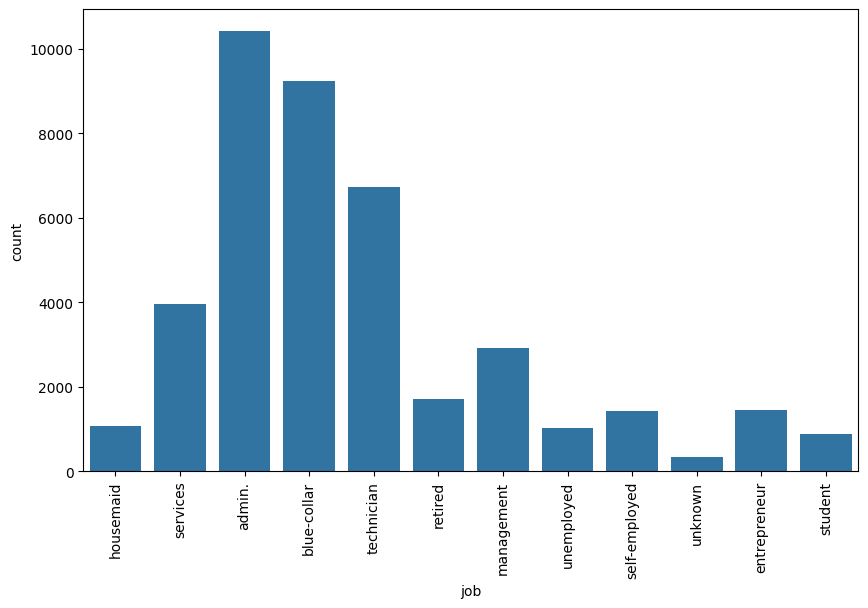

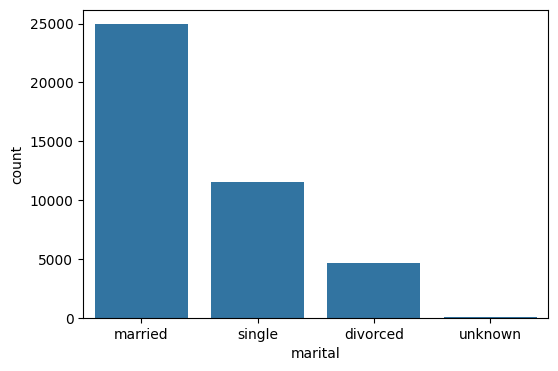

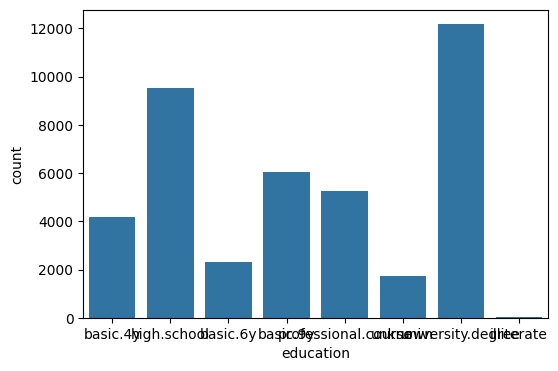

In [50]:
# Count plot for job
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.xticks(rotation=90)
plt.show()

# Count plot for marital status
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', data=df)
plt.show()

# Count plot for education
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=df)
plt.show()


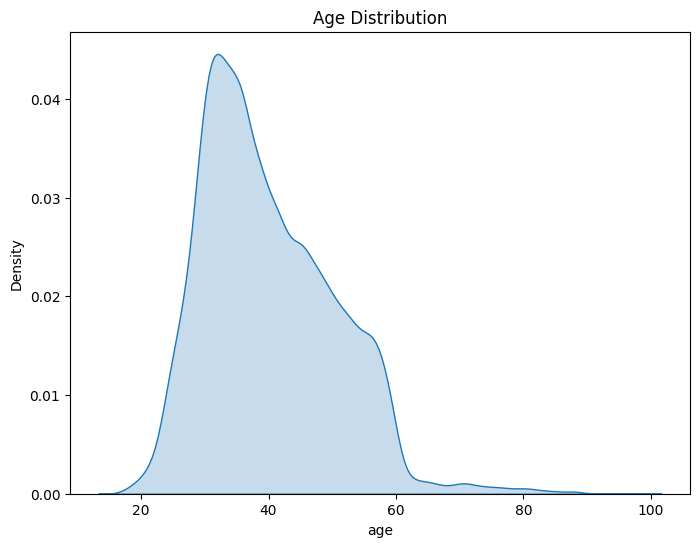

In [51]:
# KDE plot for age distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df['age'], shade=True)
plt.title('Age Distribution')
plt.show()


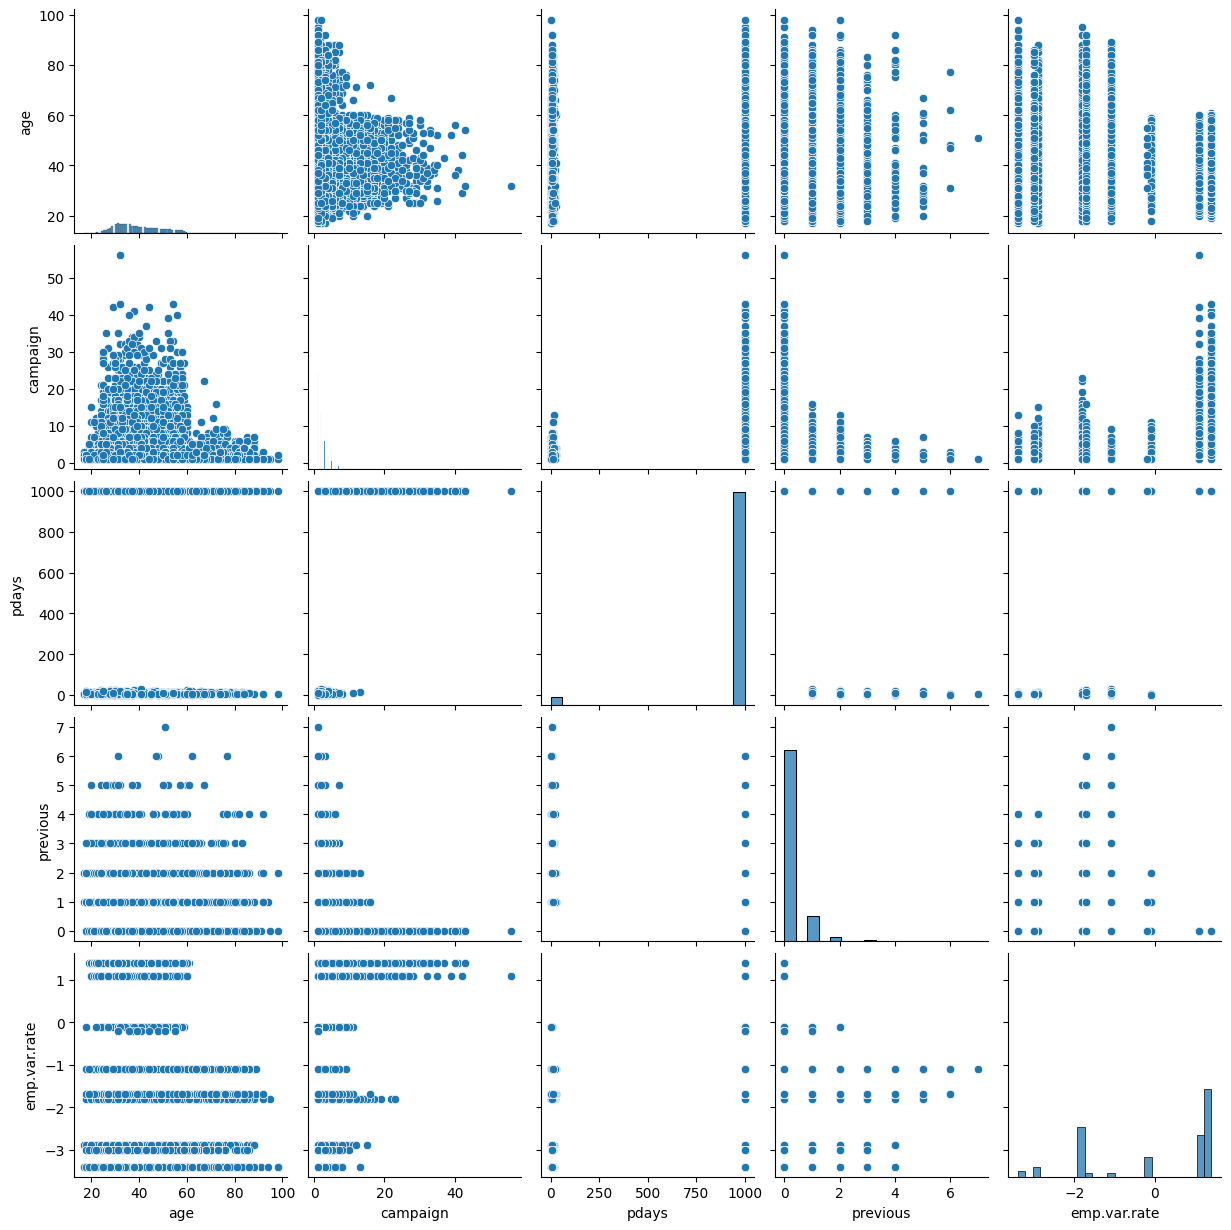

In [52]:
# Pairplot for numerical variables
sns.pairplot(df[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate']])
plt.show()


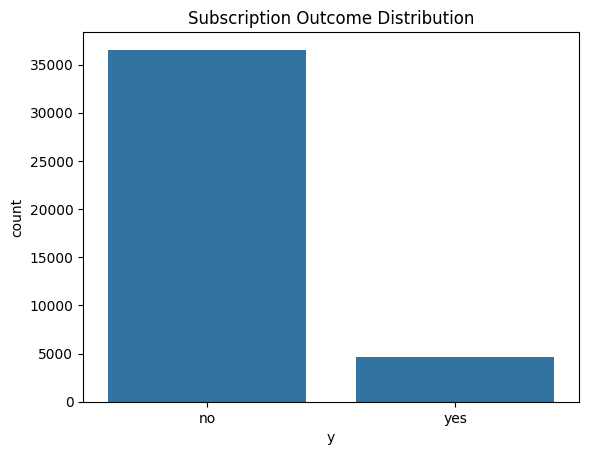

In [53]:
# Assuming 'subscribed' is your target variable
sns.countplot(x='y', data=df)
plt.title('Subscription Outcome Distribution')
plt.show()


In [54]:
# Average age by job category
df.groupby('job')['age'].mean()

# Average campaign number by marital status
df.groupby('marital')['campaign'].mean()

# Average previous contacts by education
df.groupby('education')['previous'].mean()


education
basic.4y               0.147031
basic.6y               0.129145
basic.9y               0.141439
high.school            0.185917
illiterate             0.111111
professional.course    0.163075
university.degree      0.192390
unknown                0.226459
Name: previous, dtype: float64

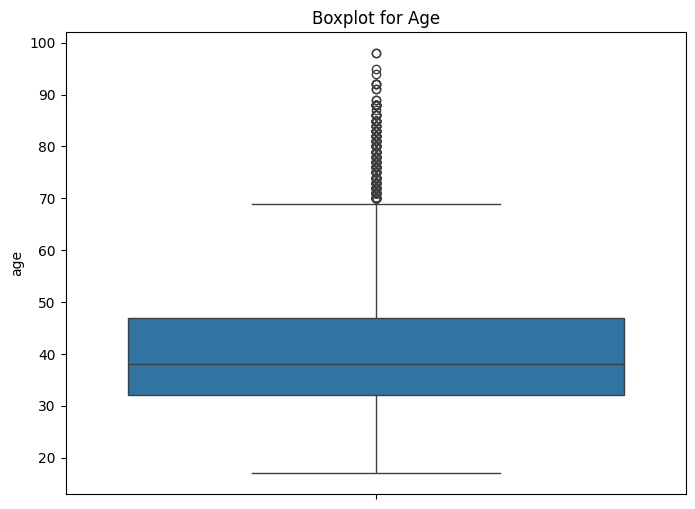

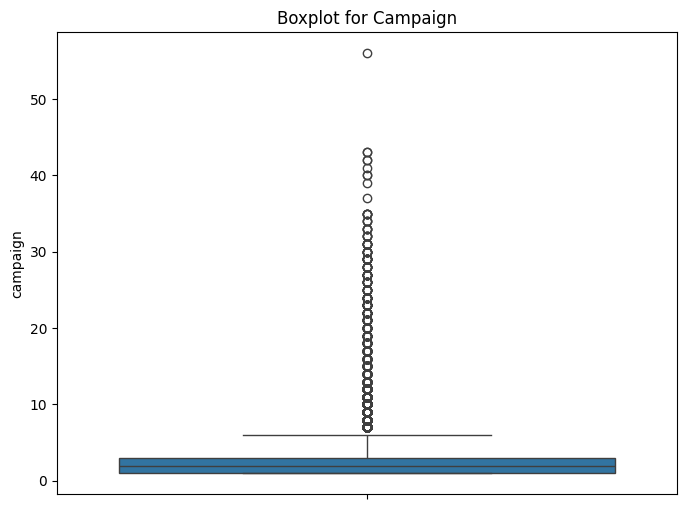

In [55]:
# Boxplot to detect outliers in age
plt.figure(figsize=(8, 6))
sns.boxplot(df['age'])
plt.title('Boxplot for Age')
plt.show()

# Boxplot to detect outliers in campaign
plt.figure(figsize=(8, 6))
sns.boxplot(df['campaign'])
plt.title('Boxplot for Campaign')
plt.show()


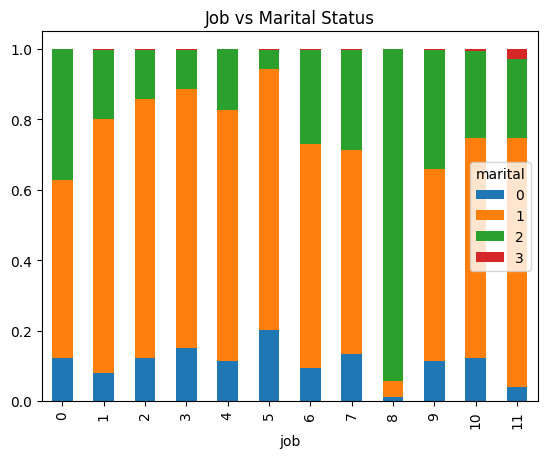

In [38]:
# Cross-tabulation of job and marital status
pd.crosstab(df['job'], df['marital'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Job vs Marital Status')
plt.show()


# 4. Feature Extraction and Data Preprocessing
Now let's prepare the data for model building. It is currently in a format that cannot be understood by a machine learning model.

In [24]:
# Here we are converting the categorical values into numerical values for ease of access

from sklearn.preprocessing import LabelEncoder
import pickle

label_encoders = {}

# Apply separate LabelEncoders for each attribute
label_encoders['job'] = LabelEncoder().fit(df['job'])
df['job'] = label_encoders['job'].transform(df['job'])

label_encoders['marital'] = LabelEncoder().fit(df['marital'])
df['marital'] = label_encoders['marital'].transform(df['marital'])

label_encoders['education'] = LabelEncoder().fit(df['education'])
df['education'] = label_encoders['education'].transform(df['education'])

label_encoders['default'] = LabelEncoder().fit(df['default'])
df['default'] = label_encoders['default'].transform(df['default'])

label_encoders['housing'] = LabelEncoder().fit(df['housing'])
df['housing'] = label_encoders['housing'].transform(df['housing'])

label_encoders['loan'] = LabelEncoder().fit(df['loan'])
df['loan'] = label_encoders['loan'].transform(df['loan'])

label_encoders['contact'] = LabelEncoder().fit(df['contact'])
df['contact'] = label_encoders['contact'].transform(df['contact'])

label_encoders['month'] = LabelEncoder().fit(df['month'])
df['month'] = label_encoders['month'].transform(df['month'])

label_encoders['day_of_week'] = LabelEncoder().fit(df['day_of_week'])
df['day_of_week'] = label_encoders['day_of_week'].transform(df['day_of_week'])

# Replace 'poutcome' manually (no LabelEncoder needed for this)
df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace=True)

# Save the label encoders to a pickle file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [10]:
# Same here but we are grouping vulnerable age range to reduce the scale of the number of categories

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
# Making sure we dont affect the original dataFrame

bank_final= df.copy()
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 19)

In [64]:
# Now let's split the data into train and test. Also let's define kfold so we can use it for cross validation

from sklearn.model_selection import train_test_split

y = df['y'].apply(lambda x: 0 if x == 'no' else 1)
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [65]:
# Normalizing all the values from 0 to 1

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Now the data is processed properly and is ready for ML

# 5. Model Building

In [66]:
# First up is Logistic Regression

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7186   93]
 [ 746  213]]
90.0


k=1 84.96 (+/- 0.48)
k=2 89.05 (+/- 0.53)
k=3 88.49 (+/- 0.57)
k=4 89.45 (+/- 0.55)
k=5 89.21 (+/- 0.54)
k=6 89.67 (+/- 0.51)
k=7 89.56 (+/- 0.64)
k=8 89.78 (+/- 0.62)
k=9 89.76 (+/- 0.68)
k=10 89.79 (+/- 0.62)
k=11 89.76 (+/- 0.61)
k=12 89.81 (+/- 0.60)
k=13 89.82 (+/- 0.51)
k=14 89.88 (+/- 0.56)
k=15 89.92 (+/- 0.54)
k=16 89.89 (+/- 0.48)
k=17 89.91 (+/- 0.56)
k=18 89.86 (+/- 0.51)
k=19 89.88 (+/- 0.48)
k=20 89.95 (+/- 0.49)
k=21 89.95 (+/- 0.50)
k=22 89.96 (+/- 0.56)
k=23 89.94 (+/- 0.53)
k=24 89.97 (+/- 0.50)
k=25 89.99 (+/- 0.52)
The optimal number of neighbors is 24 with 90.0%


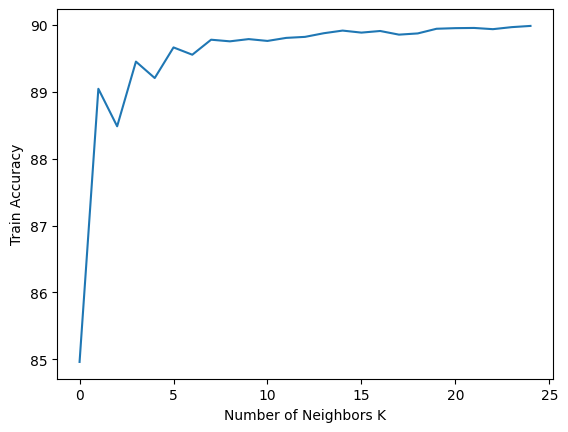

In [67]:
# Coming Second, K Nearest Neighbors. However it requires another parameter number of neighbors which is sort of found by trial and error

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [68]:
# The K Nearest Neighbors model with the k optimal number of neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7172  107]
 [ 746  213]]
90.0


In [69]:
# Third up is Support Vector Classifier

from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6595  684]
 [ 747  212]]
83.0


In [70]:
# Next up Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6619  660]
 [ 665  294]]
84.0


In [71]:
# Next up is Random Forest Classifier which is a collection of Decision Trees by bagging

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7045  234]
 [ 670  289]]
89.0


In [72]:
# Then Naive Bayes Classifier which assumes that all attributes are independant

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6441  838]
 [ 493  466]]
84.0


In [73]:
# One of the boosting models, XG Boost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[7105  174]
 [ 677  282]]
90.0


In [74]:
# Finally the second boosting model, the Gradient Boost Classifier

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7181   98]
 [ 724  235]]
90.0


# 6. Model Deployment and Reiteration

In [75]:
# Now lets identify which model is the best to be chosen on a set of metrics

models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.901608
4,Logistic Model,0.900455
3,K-Near Neighbors,0.899302
6,XGBoost,0.897997
0,Random Forest Classifier,0.892261
1,Decision Tree Classifier,0.841912
5,Gausian NB,0.833900
2,Support Vector Machine,0.828558


We can tell easily that the Gradient Boosting Model has the best accuracy. So let's deploy the Gradient Boosting model.

In [76]:
import pickle

with open("model.pkl","wb") as f:
    pickle.dump(gbk,f)

In [79]:
bank_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1
41184,2,1,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1
41185,3,5,1,6,0,2,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,2,999,0,1
41186,2,9,1,5,0,0,0,0,7,0,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1


------------------------------------------------------------------------------END-------------------------------------------------------------------------------------------